# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
288,4,96,56,17,49,20.8,0.340,26,0
668,6,98,58,33,190,34.0,0.430,43,0
237,0,179,90,27,0,44.1,0.686,23,1
701,6,125,78,31,0,27.6,0.565,49,1
655,2,155,52,27,540,38.7,0.240,25,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 13ms/step - loss: 0.7220 - accuracy: 0.5660 - val_loss: 0.6959 - val_accuracy: 0.5833
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.6059 - val_loss: 0.6745 - val_accuracy: 0.6198
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.6406 - val_loss: 0.6569 - val_accuracy: 0.6510
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.6597 - val_loss: 0.6423 - val_accuracy: 0.6667
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6402 - accuracy: 0.6858 - val_loss: 0.6299 - val_accuracy: 0.6667
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6270 - accuracy: 0.6875 - val_loss: 0.6192 - val_accuracy: 0.6875
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6157 - accuracy: 0.6962 - val_loss: 0.6098 - val_accuracy: 0.6979
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = np.argmax(model.predict(X_test_norm), axis=-1)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.48642945],
       [0.7817229 ],
       [0.25950873],
       [0.22070757],
       [0.15542604],
       [0.46135333],
       [0.0297874 ],
       [0.30635887],
       [0.92657965],
       [0.13897817]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.818


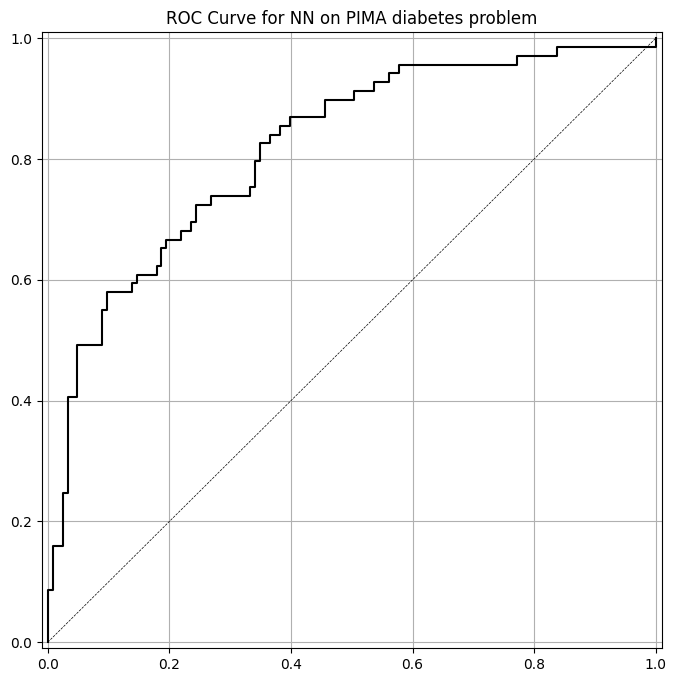

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

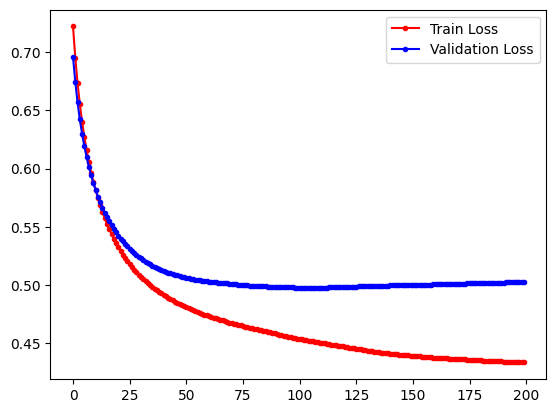

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

-The validation loss is consistently higher than the training loss  which means it is  overfitting. Normally, the validation loss is a bit higher than the training loss, which is okay. But if the validation loss starts to shoot up while the training loss keeps going down it means that the model is not performing well. The model might be memorizing the training data too much and might not do well with new data.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
model2 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"), #first hidden layer
    Dense(6,activation="relu"), #second hidden layer
    Dense(1, activation="sigmoid")
])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 14ms/step - loss: 0.7168 - accuracy: 0.4826 - val_loss: 0.7006 - val_accuracy: 0.4792
Epoch 2/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5677 - val_loss: 0.6789 - val_accuracy: 0.5729
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.6215 - val_loss: 0.6618 - val_accuracy: 0.6250
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6406 - val_loss: 0.6478 - val_accuracy: 0.6615
Epoch 5/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.6384 - accuracy: 0.6701 - val_loss: 0.6362 - val_accuracy: 0.6875
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6272 - accuracy: 0.6823 - val_loss: 0.6266 - val_accuracy: 0.6979
Epoch 7/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.6806 - val_loss: 0.6188 - val_accuracy: 0.6927
Epoch

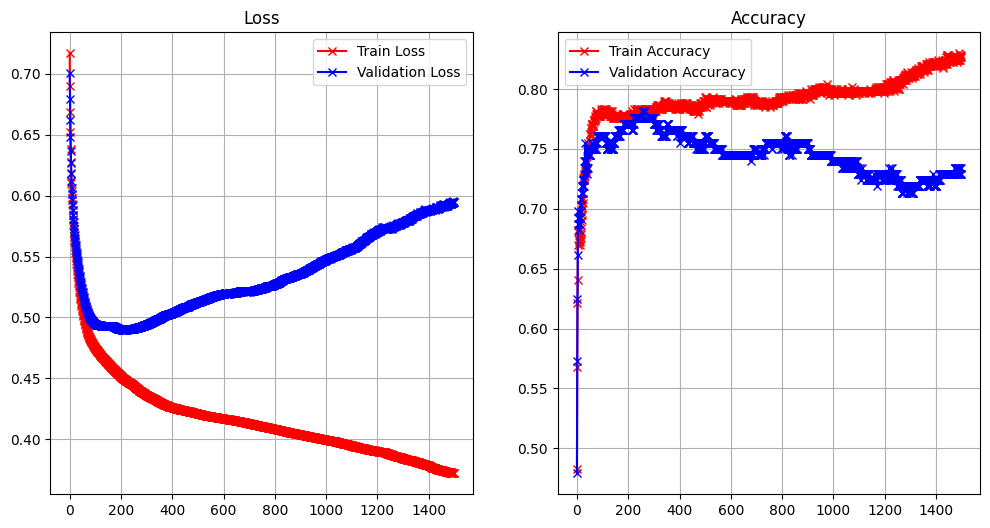

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)


plot_loss_accuracy(run_hist_2)

In the first graph, it essentially indicates that the data is overfitting because the training loss is higher than the validation loss. Even as the number of epochs increases, the training loss and accuracy improve, but there comes a point where they become stagnant or stop changing at all. This could indicate that the model has reached a limit in its improvement.

In [ ]:
y_pred_class_nn_2 = np.argmax(model2.predict(X_test_norm), axis=-1)
y_pred_prob_nn_2 = model2.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.641
roc-auc is 0.760


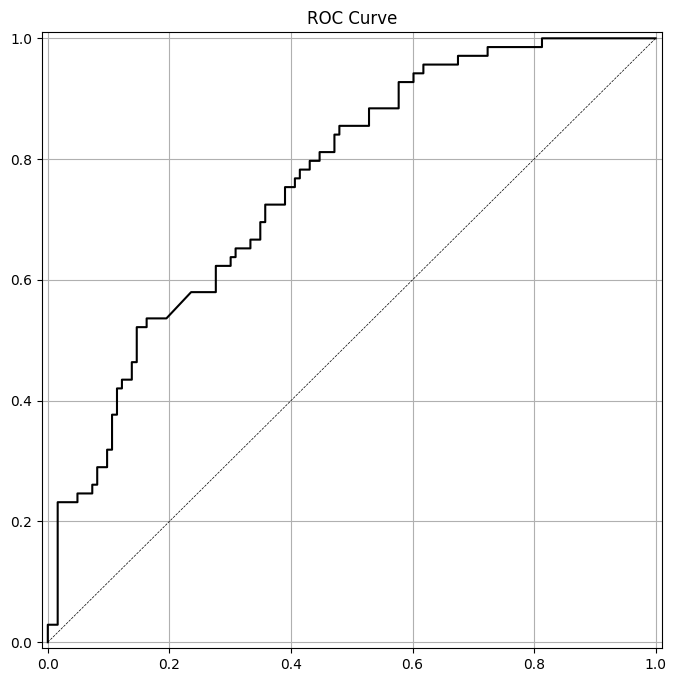

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

In [ ]:
model3 = Sequential([
    Dense(16, input_shape=(8,), activation="relu"),
    Dense(32, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5041 (19.69 KB)
Trainable params: 5041 (19.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.compile(SGD(learning_rate = .01), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=150)

Epoch 1/150
18/18 [==============================] - 1s 14ms/step - loss: 0.7013 - accuracy: 0.4236 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 2/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.6215 - val_loss: 0.6810 - val_accuracy: 0.6250
Epoch 3/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.6562 - val_loss: 0.6723 - val_accuracy: 0.6250
Epoch 4/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6637 - accuracy: 0.6615 - val_loss: 0.6660 - val_accuracy: 0.6354
Epoch 5/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.6597 - val_loss: 0.6609 - val_accuracy: 0.6406
Epoch 6/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6597 - val_loss: 0.6567 - val_accuracy: 0.6406
Epoch 7/150
18/18 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.6580 - val_loss: 0.6529 - val_accuracy: 0.6406
Epoch 8/150


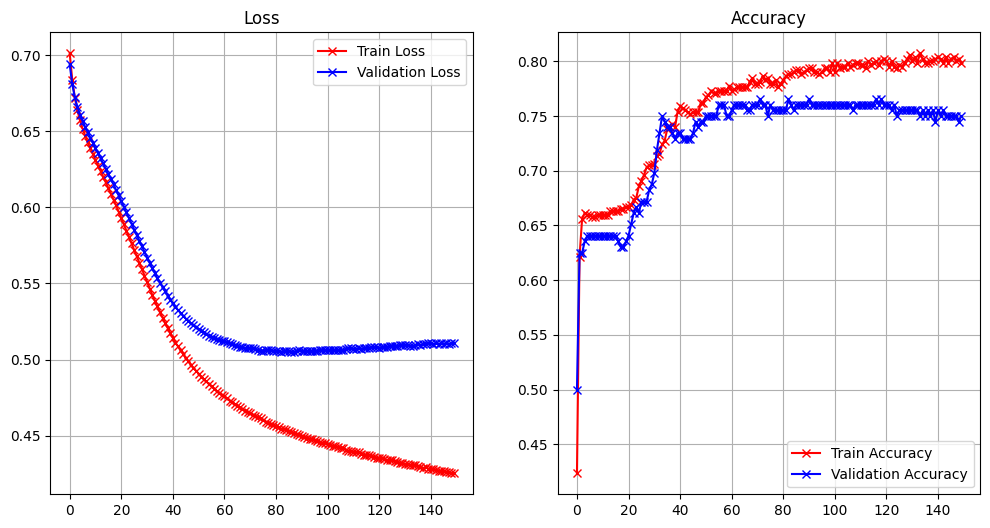

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)


plot_loss_accuracy(run_hist_3)

#### Conclusion

- The validation loss consistently exceeds the training loss, suggesting potential overfitting. Additionally, the accuracy being higher than the loss is unusual, indicating that accuracy might not be a reliable performance metric for this task. The model can be modified to improve its performance, potentially addressing the overfitting issue.